# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
% matplotlib inline

df = pd.read_csv('data/human_body_temperature.csv')

In [2]:
# Your work here.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


In [3]:
df.gender.head()

0    F
1    F
2    M
3    F
4    F
Name: gender, dtype: object

In [4]:
df.temperature.head()

0    99.3
1    98.4
2    97.8
3    99.2
4    98.0
Name: temperature, dtype: float64

In [5]:
df.heart_rate.head()

0    68.0
1    81.0
2    73.0
3    66.0
4    73.0
Name: heart_rate, dtype: float64

Questions 1 and 2

From visual inspection of the temperature histogram, it's quite plausible that this data is normal.  We can two types of checks to test for normality.

First we can use the fact that this is a sampling distribution, and see if we have met the following conditions that imply normality:

1) Random condition--the documentation states that the data came from a random sample.

2) Normality condition--this seems like circular logic, but what this is checking is if either the underlying distribution is Normal or if we have enough data points (n>30) to say that the sampling will generate a normal distribution.  With n=130, we can assume normality.

3) Independence condition--this is met either if we sampled with replacement or if our sample is less than 10% of the population size.  Since 130 << 7 billion, we meet this condition.

Second, we can run a hypothesis test with a test statistic that has a characteristic behavior when applied to a normal distribution.  I will run tests with two such test statistics and set alpha = 0.05.  For both tests the null hypothesis is that the underlying distribution exhibits normality, while the alternative hypothesis is that the distributions deviate from normality.  In both tests, we get p-values around 0.25, from which we can conclude that there's insufficient evidence for a deviation from normality.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1105072b0>]], dtype=object)

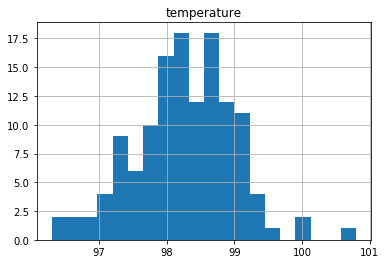

In [6]:
df.hist(column='temperature', bins=20)

In [7]:
#hypothesis testing for distribution normality
from scipy import stats

shapiro_stat, shapiro_p = stats.shapiro(df.temperature)
print('The test statistic is ' + str(shapiro_stat) + ' with an associated p-value of ' + str(shapiro_p) +'\n')

dagostino_stat, dagostino_p = stats.normaltest(df.temperature)
print('The test statistic is ' + str(dagostino_stat) + ' with an associated p-value of ' + str(dagostino_p) +'\n')


The test statistic is 0.9865770936012268 with an associated p-value of 0.233174666762352

The test statistic is 2.70380143332 with an associated p-value of 0.258747986349



Question 3

To perform a hypothesis test on if the population mean of human body temeperature is 98.6, we should first calcuate the sample mean from our data.  We get 98.25.  From there we can set up the hypothesis tests.  We will continue to use alpha = 0.05.  For the null hypothesis we have that the true mean is ≥ 98.25, while the alternative hypothesis is that the true mean is < 98.25.

We will use two types of test statistics to enter into the hypothesis test.  For the bootstrap testing, we are resampling the data with replacement for a set number of trials, and for each trial we recalculate the sample mean.  We then calculate the proportion of recalculated sample means, called bootstrap replicates, that satisfy the alternative hypothesis.  This test statistic can be directly interpreted as a p value.  For this test we obtain p = 0.0.  Since for this test the statistic can only take discrete values of fractions of the sample size, that is x/10000 where 0 ≤ x ≤ 10000, we should interpret this result as that the p value is between 0 and 1/10000.  Still, this p is sufficiently small to reject the null hypothesis and state that the true mean is at least as extreme as the sample mean, that is, mu < 98.25.

We can rerun the hypothesis test using the more traditional t statistic.  We calculate the t statistic to be -5.45 with df = 129, and the corresponding p value of 2.45e-7.  Additionally, knowing that the t statistic is a correction on the z statistic for unknown standard deviation, with convergence in probability distribution for large sample size, we can run the hypothesis test a third time with the z statistic.  The results are similar to the t statistic test, with the same conclusion.

In [8]:
import numpy as np

#function from Datacamp Statistical Thinking in Python (Part 2)
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    np.random.seed(1)
    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = func(np.random.choice(data, size=len(data)))

    return bs_replicates

In [9]:
#bootstrap hypothesis testing for mean temperature

bs_size = 10000
sample_temp_mean = df.temperature.mean()
print('The sample mean of temperature measurements is: ' + str(sample_temp_mean) + '\n')
shifted_temps = df.temperature.values - sample_temp_mean + 98.6
bs_replicates = draw_bs_reps(shifted_temps, np.mean, bs_size)
p = np.sum(bs_replicates <= sample_temp_mean) / bs_size
print('Using bootstrap hypothesis testing, with\nH0: x_bar_rep ≥ x_bar\nH1: x_bar_rep < x_bar\nwhere x_bar = \
sample mean and x_bar_rep = bootstrap replicate of the sample mean,\nwe get a p-value, which is the test statistic, \
of ' + str(p))

The sample mean of temperature measurements is: 98.24923076923078

Using bootstrap hypothesis testing, with
H0: x_bar_rep ≥ x_bar
H1: x_bar_rep < x_bar
where x_bar = sample mean and x_bar_rep = bootstrap replicate of the sample mean,
we get a p-value, which is the test statistic, of 0.0


In [10]:
#t statistic hypothesis test for mean temperature
t_stat, t_p = stats.ttest_1samp(df.temperature, 98.6)
print('Test statistic t: ' + str(t_stat) + ' with associated p value: ' + str(t_p))

Test statistic t: -5.45482329236 with associated p value: 2.41063204156e-07


In [11]:
#z statistic hypothesis test for mean temperature

z_stat = (sample_temp_mean - 98.6) / stats.sem(df.temperature)
z_p = stats.norm.cdf(z_stat)
print('Test statistic z: ' + str(z_stat) + ' with associated p value: ' + str(z_p))

Test statistic z: -5.45482329236 with associated p value: 2.45107850706e-08


Question 4

Here we are taking a smaller sample of n = 10 from our original sample and recalculating both frequentist hypothesis tests.  As stated earlier, the t statistic is a correction of the z statistic for unknown standard deviation, and converges in probability distribution for large n.  Reducing the sample size will cause the results to diverge, which is what happens when the two hypothesis tests are calculated.  With the t statistic we cannot reject the null hypothesis, while with the z statistic we can.  Behind the scenes, both the standard normal distribution and its derivative t distribution have an "idealized" variance of 1.  However, the correction in the t distribution, calculated from the degrees of freedom, effectively rescales the variance to be greater than 1.  This causes the probability density for extreme values to increase, thereby causing the p value to increase with respect to the corresponding z statistic and p value.

In [12]:
sm_sample = np.random.choice(df.temperature, replace=False, size=10)
print(sm_sample, type(sm_sample), '\n')
t_sm_stat, t_sm_p = stats.ttest_1samp(sm_sample, 98.6)
print('Test statistic t: ' + str(t_sm_stat) + ' with associated p value: ' + str(t_sm_p) + '\n')
z_sm_stat = (np.mean(sm_sample) - 98.6) / stats.sem(sm_sample)
z_sm_p = stats.norm.cdf(z_sm_stat)
print('Test statistic z: ' + str(z_sm_stat) + ' with associated p value: ' + str(z_sm_p) + '\n')

[  98.9   98.6   98.3   99.9   99.1   98.5   98.1  100.8   98.4   99.1] <class 'numpy.ndarray'> 

Test statistic t: 1.4164571145 with associated p value: 0.190309647282

Test statistic z: 1.4164571145 with associated p value: 0.921679144072



Question 5

I will define "abnormal" to be outside the 95% confidence interval of a 1-sample estimate of the mean temperature.  With that set, we can calculate the confidence interval using our two approaches.  The bootstrap method devolves into calculating an interval with the 2.5 and 97.5 percentile data measurements.  For the frequentist approach, we calculate the standard deviation of the data.  We then use the fact that, for a normal distribution, 95% of the probability density lies within approximately 1.96 standard deviations of the mean to create the confidence interval.

In [13]:
#bootstrap confidence interval

bs_conf_int = np.percentile(df.temperature, [2.5, 97.5])
print('Bootstrap confidence interval: ' + str(bs_conf_int) + '\n')

#frequentist confidence interval
offset = 1.96 * df.temperature.std()
freq_conf_int = np.array([sample_temp_mean - offset, sample_temp_mean + offset])
print('Frequentist confidence interval: ' + str(freq_conf_int) + '\n')

Bootstrap confidence interval: [ 96.7225  99.4775]

Frequentist confidence interval: [ 96.81219178  99.68626976]



Question 6

For this hypothesis test we will use an unpaired two-sample t test.  The two samples are the female and male samples.  The results should be interpreted as the probability that the empirical difference between the two sample means would be measured given that the two true means are the same.  We reject the null hypothesis and state that there is sufficient statistical evidence to support the assertion that the population means between female and male body temperatures are different.

In [14]:
#t statistic hypothesis test of difference between female and male temperatures

female_temp = df.temperature[df.gender == 'F']
male_temp = df.temperature[df.gender == 'M']
t_diff_stat, t_diff_p = stats.ttest_ind(female_temp, male_temp)
print('Test statistic t: ' + str(t_diff_stat) + ' with associated p value: ' + str(t_diff_p) + '\n')

Test statistic t: 2.28543453817 with associated p value: 0.0239318831224

